
# Практическая работа 3. Работа с API. Тестовые наборы данных Kaggle API
Практическая работа 3. Работа с API. Тестовые наборы данных Kaggle API

**Задание**

3.1. Спроектировать верхнеуровневую архитектуру аналитического решения в `draw.io`. Необходимо использовать:

- Source Layer - слой источников данных.
- Storage Layer - слой хранения данных.
- Business Layer - слой для доступа к данным бизнес пользователей.

3.2. Получить ключ Kaggle API.

3.3. Настроить среду.

3.4. Провести поиск наборов данных в Kaggle по ключевому слову. Выполнить анализ данных датасета Kuggle, обновленный в `2023-2024` годах.

3.5. Провести анализ датасета на пустые значения. Очистить данные от нулевых и пустых значений. Выбрать только те данные, которые можно в дальнейщем анализировать(числовые характеристики, бинарные и т.д.).

3.6. Получить качественный датасет. Выгрузить его в формате `clear.csv`.

3.7. Реализовать визуализацию полученных метрик в отечественной BI-системе или в аналитических панелях с открытым исходным кодом, например `Apache Superset`.

Результаты практической работы представить в виде файла `ФИО.ipynb`, `clear.csv`.


# Задание 3.1.
Спроектировать верхнеуровневую архитектуру аналитического решения

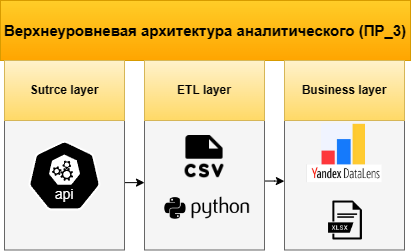

# Задание 3.2.-3.6.

Дополнительная информация по работе с [Kaggle API](https://github.com/Kaggle/kaggle-api)

1. **Создайте ключ `API` в `Kaggle`**.

Моя учетная запись -> Settings-> API -> Создать новые токены API.

На ваш компьютер будет загружен файл `kaggle.json`. Вы можете загрузить на `Google` Диск вручную или использовать для загрузки приведенный ниже скрипт.

Если вы хотите использовать скрипт для загрузки файла `kaggle.json`, используйте следующий фрагмент в ячейке кода:

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"annabashkatova","key":"fd8543df39ce8f17e7eb3f97dbc5bd66"}'}

Установите `Kaggle API`, используя

In [2]:
!pip install -q kaggle

Переместите файл `kaggle.json` в **~/.kaggle**, где клиент `API` ожидает расположения вашего токена:

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

Предоставьте разрешения на изменение, чтобы избежать предупреждения при запуске инструмента `Kaggle`.

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

Теперь можно получить доступ к наборам данных с помощью клиента

In [5]:
!kaggle datasets list

ref                                                     title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                      Vehicle Sales Data                             19MB  2024-02-21 20:16:17           4783         80  1.0              
nelgiriyewithana/apple-quality                          Apple Quality                                 170KB  2024-01-11 14:31:07          24260        521  1.0              
kanchana1990/spotifys-long-hits-2014-2024               Spotify's Long Hits (2014-2024) 🎶              38KB  2024-02-23 12:39:02           1778         44  1.0              
xontoloyo/data-penjualan-zara                           ZARA Sales                                     17KB  2024-02-27 05:37:53  

In [6]:
import kaggle

# List of all datasets available on Kaggle
kaggle.api.dataset_list()

[syedanwarafridi/vehicle-sales-data,
 nelgiriyewithana/apple-quality,
 kanchana1990/spotifys-long-hits-2014-2024,
 xontoloyo/data-penjualan-zara,
 tarunrm09/climate-change-indicators,
 mikhail1681/walmart-sales,
 dhavalpatel555/us-stock-market-2020-to-2024,
 nelgiriyewithana/emotions,
 willianoliveiragibin/drug-overdose-death,
 mikhail1681/mcdonalds-financial-statements-2002-2022,
 kapoorprakhar/college-placement-dataset,
 dansbecker/melbourne-housing-snapshot,
 harshitstark/covid-19-global-statistics-dataset,
 willianoliveiragibin/alcohol-consumption,
 imyjoshua/average-time-spent-by-a-user-on-social-media,
 kanchana1990/best-buy-2024-windows-laptops,
 verracodeguacas/pii-deberta-models,
 aadharshviswanath/flight-data,
 raphaelmanayon/temperature-and-ice-cream-sales,
 bhavikjikadara/loan-status-prediction]

In [8]:
# поиск наборов данных в Kaggle о ""ключевое слово"""
#Вариант №5. Ключевое слово: HEALTHY LIVING.
datasets = kaggle.api.datasets_list(search="HEALTHY LIVING")
print(datasets)

[{'subtitleNullable': '10 healthy living metrics in top 44 cities', 'creatorNameNullable': 'Prasert Kanawattanachai', 'creatorUrlNullable': 'prasertk', 'totalBytesNullable': 1928, 'urlNullable': 'https://www.kaggle.com/datasets/prasertk/healthy-lifestyle-cities-report-2021', 'licenseNameNullable': 'CC0: Public Domain', 'descriptionNullable': None, 'ownerNameNullable': 'Prasert Kanawattanachai', 'ownerRefNullable': 'prasertk', 'titleNullable': 'Healthy Lifestyle Cities Report 2021', 'currentVersionNumberNullable': 1, 'usabilityRatingNullable': 1.0, 'id': 1968689, 'ref': 'prasertk/healthy-lifestyle-cities-report-2021', 'subtitle': '10 healthy living metrics in top 44 cities', 'hasSubtitle': True, 'creatorName': 'Prasert Kanawattanachai', 'hasCreatorName': True, 'creatorUrl': 'prasertk', 'hasCreatorUrl': True, 'totalBytes': 1928, 'hasTotalBytes': True, 'url': 'https://www.kaggle.com/datasets/prasertk/healthy-lifestyle-cities-report-2021', 'hasUrl': True, 'lastUpdated': '2022-03-03T00:26:0

In [9]:
!kaggle datasets list -s "HEALTHY LIVING"

ref                                                      title                                      size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  ----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
prasertk/healthy-lifestyle-cities-report-2021            Healthy Lifestyle Cities Report 2021        2KB  2022-03-03 00:26:02          10634        171  1.0              
narendrageek/mental-health-faq-for-chatbot               Mental Health FAQ for Chatbot              50KB  2020-10-02 14:51:43           7434        119  1.0              
rmisra/news-category-dataset                             News Category Dataset                      27MB  2022-09-24 08:07:21          61327        718  1.0              
ydalat/lifestyle-and-wellbeing-data                      Lifestyle_and_Wellbeing_Data              294KB  2021-03-14 14:11:05           7556     

In [10]:
!pip install pandas
import pandas as pd

In [11]:
datasets = kaggle.api.datasets_list(search="HEALTHY LIVING")
df1=pd.DataFrame(datasets)
pd.DataFrame(datasets)

,subtitleNullable,creatorNameNullable,creatorUrlNullable,totalBytesNullable,urlNullable,licenseNameNullable,descriptionNullable,ownerNameNullable,ownerRefNullable,titleNullable,...,topicCount,viewCount,voteCount,currentVersionNumber,hasCurrentVersionNumber,usabilityRating,hasUsabilityRating,tags,files,versions
0,10 healthy living metrics in top 44 cities,Prasert Kanawattanachai,prasertk,1928,https://www.kaggle.com/datasets/prasertk/healt...,CC0: Public Domain,None,Prasert Kanawattanachai,prasertk,Healthy Lifestyle Cities Report 2021,...,0,65316,171,1,True,1.000000,True,"[{'nameNullable': 'cities and urban areas', 'd...",[],[]
1,Get answers to all mental health related queries,Narendra Prasath,narendrageek,51326,https://www.kaggle.com/datasets/narendrageek/m...,Other (specified in description),None,Narendra Prasath,narendrageek,Mental Health FAQ for Chatbot,...,0,61682,119,1,True,1.000000,True,"[{'nameNullable': 'mental health', 'descriptio...",[],[]
2,Identify the type of news based on headlines a...,Rishabh Misra,rmisra,27829769,https://www.kaggle.com/datasets/rmisra/news-ca...,Attribution 4.0 International (CC BY 4.0),None,Rishabh Misra,rmisra,News Category Dataset,...,0,413883,718,3,True,1.000000,True,"[{'nameNullable': 'linguistics', 'descriptionN...",[],[]
3,"12,757 survey responses with 23 attributes des...",Yvon Dalat,ydalat,301533,https://www.kaggle.com/datasets/ydalat/lifesty...,Data files © Original Authors,None,Yvon Dalat,ydalat,Lifestyle_and_Wellbeing_Data,...,0,67566,108,11,True,1.000000,True,"[{'nameNullable': 'exercise', 'descriptionNull...",[],[]
4,"Countries ranked by human development, gender ...",Abigail Larion,abigaillarion,188599,https://www.kaggle.com/datasets/undp/human-dev...,CC BY-SA 4.0,None,United Nations Development Program,organizations/undp,Human Development Report 2015,...,0,49589,110,1,True,0.852941,True,"[{'nameNullable': 'demographics', 'description...",[],[]
5,Lincolnshire County Council Life Expectancy,Marília Prata,mpwolke,1489,https://www.kaggle.com/datasets/mpwolke/cusers...,Other (specified in description),None,Marília Prata,mpwolke,Healthy Life Expectancy,...,0,22333,109,1,True,1.000000,True,"[{'nameNullable': 'health', 'descriptionNullab...",[],[]
6,Historical data for HDI of countries,ElMartian,elmartini,11213,https://www.kaggle.com/datasets/elmartini/huma...,CC0: Public Domain,None,ElMartian,elmartini,Human Development Index Historical data,...,0,7623,42,1,True,1.000000,True,"[{'nameNullable': 'education', 'descriptionNul...",[],[]
7,Discover insights into characteristics of livi...,Iris Shih,irisshih,19713713,https://www.kaggle.com/datasets/kmader/floodli...,Other (specified in description),None,K Scott Mader,kmader,Floodlight Open Dataset,...,0,14336,20,4,True,1.000000,True,"[{'nameNullable': 'healthcare', 'descriptionNu...",[],[]
8,Includes CT scans of patients diagnosed with L...,Aditya Mahimkar,adityamahimkar,208562220,https://www.kaggle.com/datasets/adityamahimkar...,Data files © Original Authors,None,Aditya Mahimkar,adityamahimkar,IQ-OTH/NCCD - Lung Cancer Dataset,...,0,32569,47,2,True,0.812500,True,"[{'nameNullable': 'medicine', 'descriptionNull...",[],[]
9,Heart Disease Dataset,Mirza_Hasnine,mirzahasnine,62688,https://www.kaggle.com/datasets/mirzahasnine/h...,"Database: Open Database, Contents: Database Co...",None,Mirza_Hasnine,mirzahasnine,Heart Disease Dataset,...,0,23225,53,1,True,0.823529,True,"[{'nameNullable': 'heart conditions', 'descrip...",[],[]


Так как по заданию необходимо выполнить анализ данных датасета Kuggle, обновленный в 2023-2024 годах, то отфильтруем датасеты обновленные не более года назад

In [12]:
df1.columns #просмотрим столбцы, чтобы найти даты обновления

Index(['subtitleNullable', 'creatorNameNullable', 'creatorUrlNullable',
       'totalBytesNullable', 'urlNullable', 'licenseNameNullable',
       'descriptionNullable', 'ownerNameNullable', 'ownerRefNullable',
       'titleNullable', 'currentVersionNumberNullable',
       'usabilityRatingNullable', 'id', 'ref', 'subtitle', 'hasSubtitle',
       'creatorName', 'hasCreatorName', 'creatorUrl', 'hasCreatorUrl',
       'totalBytes', 'hasTotalBytes', 'url', 'hasUrl', 'lastUpdated',
       'downloadCount', 'isPrivate', 'isFeatured', 'licenseName',
       'hasLicenseName', 'description', 'hasDescription', 'ownerName',
       'hasOwnerName', 'ownerRef', 'hasOwnerRef', 'kernelCount', 'title',
       'hasTitle', 'topicCount', 'viewCount', 'voteCount',
       'currentVersionNumber', 'hasCurrentVersionNumber', 'usabilityRating',
       'hasUsabilityRating', 'tags', 'files', 'versions'],
      dtype='object')

In [13]:
import pandas as pd
from datetime import datetime, timedelta
import pytz

#преобразуем текущие даты в UTC
current_date_utc = datetime.now(pytz.utc)

#преобразуем столбцы 'lastUpdated' в формат даты и в UTC
df1['lastUpdated'] = pd.to_datetime(df1['lastUpdated']).dt.tz_convert(pytz.utc)

#расчет даты, которая находится год назад от текущей даты
one_year_ago = current_date_utc - timedelta(days=365)

#фильтр для отбора строк не позднее года назад
filtered_df = df1[df1['lastUpdated'] >= one_year_ago]

In [14]:
filtered_df

,subtitleNullable,creatorNameNullable,creatorUrlNullable,totalBytesNullable,urlNullable,licenseNameNullable,descriptionNullable,ownerNameNullable,ownerRefNullable,titleNullable,...,topicCount,viewCount,voteCount,currentVersionNumber,hasCurrentVersionNumber,usabilityRating,hasUsabilityRating,tags,files,versions
7,Discover insights into characteristics of livi...,Iris Shih,irisshih,19713713,https://www.kaggle.com/datasets/kmader/floodli...,Other (specified in description),None,K Scott Mader,kmader,Floodlight Open Dataset,...,0,14336,20,4,True,1.000000,True,"[{'nameNullable': 'healthcare', 'descriptionNu...",[],[]
9,Heart Disease Dataset,Mirza_Hasnine,mirzahasnine,62688,https://www.kaggle.com/datasets/mirzahasnine/h...,"Database: Open Database, Contents: Database Co...",None,Mirza_Hasnine,mirzahasnine,Heart Disease Dataset,...,0,23225,53,1,True,0.823529,True,"[{'nameNullable': 'heart conditions', 'descrip...",[],[]
10,World Human Development Report 2021,Raj Kumar Pandey,rajkumarpandey02,5334,https://www.kaggle.com/datasets/rajkumarpandey...,CC0: Public Domain,None,Raj Kumar Pandey,rajkumarpandey02,Human Development Index and Components,...,0,9241,53,1,True,1.000000,True,"[{'nameNullable': 'business', 'descriptionNull...",[],[]
14,Global Human Development Index Dataset: Insigh...,Sourav Banerjee,iamsouravbanerjee,641340,https://www.kaggle.com/datasets/iamsouravbaner...,Other (specified in description),None,Sourav Banerjee,iamsouravbanerjee,Human Development World Index,...,0,15417,88,7,True,1.000000,True,"[{'nameNullable': 'culture and humanities', 'd...",[],[]
18,Images of children with and without Down syndr...,Merve Çaylı,mervecayli,31942914,https://www.kaggle.com/datasets/mervecayli/det...,Unknown,None,Merve Çaylı,mervecayli,Detection of Down Syndrome in Children,...,0,2772,10,1,True,0.705882,True,"[{'nameNullable': 'health', 'descriptionNullab...",[],[]
19,"COVID 19 dataset from Jan 1st, 2020 to Feb 8t...",SandhyaKrishnan02,sandhyakrishnan02,14008035,https://www.kaggle.com/datasets/sandhyakrishna...,CC BY-SA 3.0,None,SandhyaKrishnan02,sandhyakrishnan02,COVID 19 worldwide case,...,0,5226,44,15,True,1.000000,True,"[{'nameNullable': 'public health', 'descriptio...",[],[]


In [15]:
#просмотрим адрес нужного датасета
value = filtered_df .iloc[2]['ref']
print(value)

rajkumarpandey02/human-development-index-and-components


In [18]:
filtered_df.to_excel("HEALTHY_LIVING.xlsx", sheet_name='HEALTHY LIVING')

In [19]:
from google.colab import files
files.download('HEALTHY_LIVING.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Изучим датасет **Human Development Index and Components**


Download Dataset.

In [20]:
!kaggle datasets download -d rajkumarpandey02/human-development-index-and-components

  0% 0.00/5.21k [00:00<?, ?B/s]
100% 5.21k/5.21k [00:00<00:00, 9.18MB/s]


In [ ]:
ls

human-development-index-and-components.zip  kaggle.json  sample_data/


In [21]:
import zipfile

with zipfile.ZipFile("human-development-index-and-components.zip","r") as zip_ref:
    #extracting content in the zipfile
    zip_ref.extractall()

In [22]:
ls

 HEALTHY_LIVING.xlsx                           kaggle.json
'Human Development Index and Components.csv'   sample_data/
 human-development-index-and-components.zip


In [23]:
import pandas as pd
#reading the contents
df = pd.read_csv("Human Development Index and Components.csv", encoding="ISO-8859-1")

#printing first 6 raws of the dataframe
df.head(10)

,HDI rank,Country,HUMAN DEVELOPMENT,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank.1,Unnamed: 10,Unnamed: 11
0,1,Switzerland,VERY HIGH,0.962,84.0,16.5,13.9,"66,933",5,3,NaN,NaN
1,2,Norway,VERY HIGH,0.961,83.2,18.2,13.0,"64,660",6,1,NaN,NaN
2,3,Iceland,VERY HIGH,0.959,82.7,19.2,13.8,"55,782",11,2,NaN,NaN
3,4,"Hong Kong, China (SAR)",VERY HIGH,0.952,85.5,17.3,12.2,"62,607",6,4,NaN,NaN
4,5,Australia,VERY HIGH,0.951,84.5,21.1,12.7,"49,238",18,5,NaN,NaN
5,6,Denmark,VERY HIGH,0.948,81.4,18.7,13.0,"60,365",6,5,NaN,NaN
6,7,Sweden,VERY HIGH,0.947,83.0,19.4,12.6,"54,489",9,9,NaN,NaN
7,8,Ireland,VERY HIGH,0.945,82.0,18.9,11.6,"76,169",-3,8,NaN,NaN
8,9,Germany,VERY HIGH,0.942,80.6,17.0,14.1,"54,534",6,7,NaN,NaN
9,10,Netherlands,VERY HIGH,0.941,81.7,18.7,12.6,"55,979",3,10,NaN,NaN


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   HDI rank                                195 non-null    int64  
 1   Country                                 195 non-null    object 
 2   HUMAN DEVELOPMENT                       195 non-null    object 
 3   Human Development Index (HDI)           195 non-null    object 
 4   Life expectancy at birth                195 non-null    float64
 5   Expected years of schooling             195 non-null    object 
 6   Mean years of schooling                 195 non-null    object 
 7   Gross national income (GNI) per capita  195 non-null    object 
 8   GNI per capita rank minus HDI rank      195 non-null    object 
 9   HDI rank.1                              195 non-null    object 
 10  Unnamed: 10                             0 non-null      float6

In [25]:
# Посмотрим количество пустых значений в каждом столбце
missing_values = df.isnull().sum()
print(missing_values)

HDI rank                                    0
Country                                     0
HUMAN DEVELOPMENT                           0
Human Development Index (HDI)               0
Life expectancy at birth                    0
Expected years of schooling                 0
Mean years of schooling                     0
Gross national income (GNI) per capita      0
GNI per capita rank minus HDI rank          0
HDI rank.1                                  0
Unnamed: 10                               195
Unnamed: 11                               195
dtype: int64


In [26]:
#удалим столбцы с нулевыми значениями
df.drop(['Unnamed: 10', 'Unnamed: 11'], axis=1, inplace=True)

In [28]:
df.isnull().values.any()

False

In [29]:
df.isnull().sum()

HDI rank                                  0
Country                                   0
HUMAN DEVELOPMENT                         0
Human Development Index (HDI)             0
Life expectancy at birth                  0
Expected years of schooling               0
Mean years of schooling                   0
Gross national income (GNI) per capita    0
GNI per capita rank minus HDI rank        0
HDI rank.1                                0
dtype: int64

In [30]:
df.head(5)

,HDI rank,Country,HUMAN DEVELOPMENT,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank.1
0,1,Switzerland,VERY HIGH,0.962,84.0,16.5,13.9,"66,933",5,3
1,2,Norway,VERY HIGH,0.961,83.2,18.2,13.0,"64,660",6,1
2,3,Iceland,VERY HIGH,0.959,82.7,19.2,13.8,"55,782",11,2
3,4,"Hong Kong, China (SAR)",VERY HIGH,0.952,85.5,17.3,12.2,"62,607",6,4
4,5,Australia,VERY HIGH,0.951,84.5,21.1,12.7,"49,238",18,5


In [31]:
#столбцы, которые нужно исключить
columns_to_exclude = ['HDI rank.1', 'GNI per capita rank minus HDI rank']

#датасет с нужными столбцами
new_df = df.drop(columns=columns_to_exclude)
new_df

,HDI rank,Country,HUMAN DEVELOPMENT,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita
0,1,Switzerland,VERY HIGH,0.962,84.0,16.5,13.9,"66,933"
1,2,Norway,VERY HIGH,0.961,83.2,18.2,13.0,"64,660"
2,3,Iceland,VERY HIGH,0.959,82.7,19.2,13.8,"55,782"
3,4,"Hong Kong, China (SAR)",VERY HIGH,0.952,85.5,17.3,12.2,"62,607"
4,5,Australia,VERY HIGH,0.951,84.5,21.1,12.7,"49,238"
...,...,...,...,...,...,...,...,...
190,191,South Sudan,LOW,0.385,55.0,5.5,5.7,768
191,192,Korea (Democratic People's Rep. of),OTHER,..,73.3,10.8,..,..
192,193,Monaco,OTHER,..,85.9,..,..,..
193,194,Nauru,OTHER,..,63.6,11.7,..,"17,730"


In [32]:
new_df.columns

Index(['HDI rank', 'Country', 'HUMAN DEVELOPMENT',
       'Human Development Index (HDI) ', 'Life expectancy at birth',
       'Expected years of schooling', 'Mean years of schooling',
       'Gross national income (GNI) per capita'],
      dtype='object')

In [33]:
#обработка значения ".."
new_df['Human Development Index (HDI) '] = pd.to_numeric(new_df['Human Development Index (HDI) '], errors='coerce')

In [34]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   HDI rank                                195 non-null    int64  
 1   Country                                 195 non-null    object 
 2   HUMAN DEVELOPMENT                       195 non-null    object 
 3   Human Development Index (HDI)           191 non-null    float64
 4   Life expectancy at birth                195 non-null    float64
 5   Expected years of schooling             195 non-null    object 
 6   Mean years of schooling                 195 non-null    object 
 7   Gross national income (GNI) per capita  195 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 12.3+ KB


In [35]:
#удалить строки, где хотя бы одно значение равно ".."
new_df = new_df[new_df.ne('..').all(axis=1)]

# новый DataFrame без строк, где хотя бы одно значение равно "..":
new_df = new_df[new_df.ne('..').all(axis=1)].copy()

In [36]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 190
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   HDI rank                                191 non-null    int64  
 1   Country                                 191 non-null    object 
 2   HUMAN DEVELOPMENT                       191 non-null    object 
 3   Human Development Index (HDI)           191 non-null    float64
 4   Life expectancy at birth                191 non-null    float64
 5   Expected years of schooling             191 non-null    object 
 6   Mean years of schooling                 191 non-null    object 
 7   Gross national income (GNI) per capita  191 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 13.4+ KB


In [ ]:
new_df['Gross national income (GNI) per capita'] = new_df['Gross national income (GNI) per capita'].str.replace(',', '')

In [37]:
#обработка столбца, где в значении есть ","
new_df['Gross national income (GNI) per capita'] = new_df['Gross national income (GNI) per capita'].str.replace(',', '').astype(float)

In [38]:
data_type_dict = {"Human Development Index (HDI) ":"float64",
                  "Expected years of schooling": "float64",
                  "Mean years of schooling": "float64",
                 }
df2 = new_df.astype(data_type_dict)

In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 190
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   HDI rank                                191 non-null    int64  
 1   Country                                 191 non-null    object 
 2   HUMAN DEVELOPMENT                       191 non-null    object 
 3   Human Development Index (HDI)           191 non-null    float64
 4   Life expectancy at birth                191 non-null    float64
 5   Expected years of schooling             191 non-null    float64
 6   Mean years of schooling                 191 non-null    float64
 7   Gross national income (GNI) per capita  191 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 13.4+ KB


In [40]:
df2

,HDI rank,Country,HUMAN DEVELOPMENT,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita
0,1,Switzerland,VERY HIGH,0.962,84.0,16.5,13.9,66933.0
1,2,Norway,VERY HIGH,0.961,83.2,18.2,13.0,64660.0
2,3,Iceland,VERY HIGH,0.959,82.7,19.2,13.8,55782.0
3,4,"Hong Kong, China (SAR)",VERY HIGH,0.952,85.5,17.3,12.2,62607.0
4,5,Australia,VERY HIGH,0.951,84.5,21.1,12.7,49238.0
...,...,...,...,...,...,...,...,...
186,187,Burundi,LOW,0.426,61.7,10.7,3.1,732.0
187,188,Central African Republic,LOW,0.404,53.9,8.0,4.3,966.0
188,189,Niger,LOW,0.400,61.6,7.0,2.1,1240.0
189,190,Chad,LOW,0.394,52.5,8.0,2.6,1364.0


In [41]:
#Сохранение в файл clear.csv
df2.to_csv('clear.csv', index=False)
files.download('clear.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 3.7. Реализовать визуализацию полученных метрик в отечественной BI-системе или в аналитических панелях с открытым исходным кодом, например Apache Superset.

Ссылка на визуализацию в Yandex Datalens: https://datalens.yandex.ru/rtsv0lpd7e42f-indeks-chelovecheskogo-razvitiya

Общий вид на дашборд:

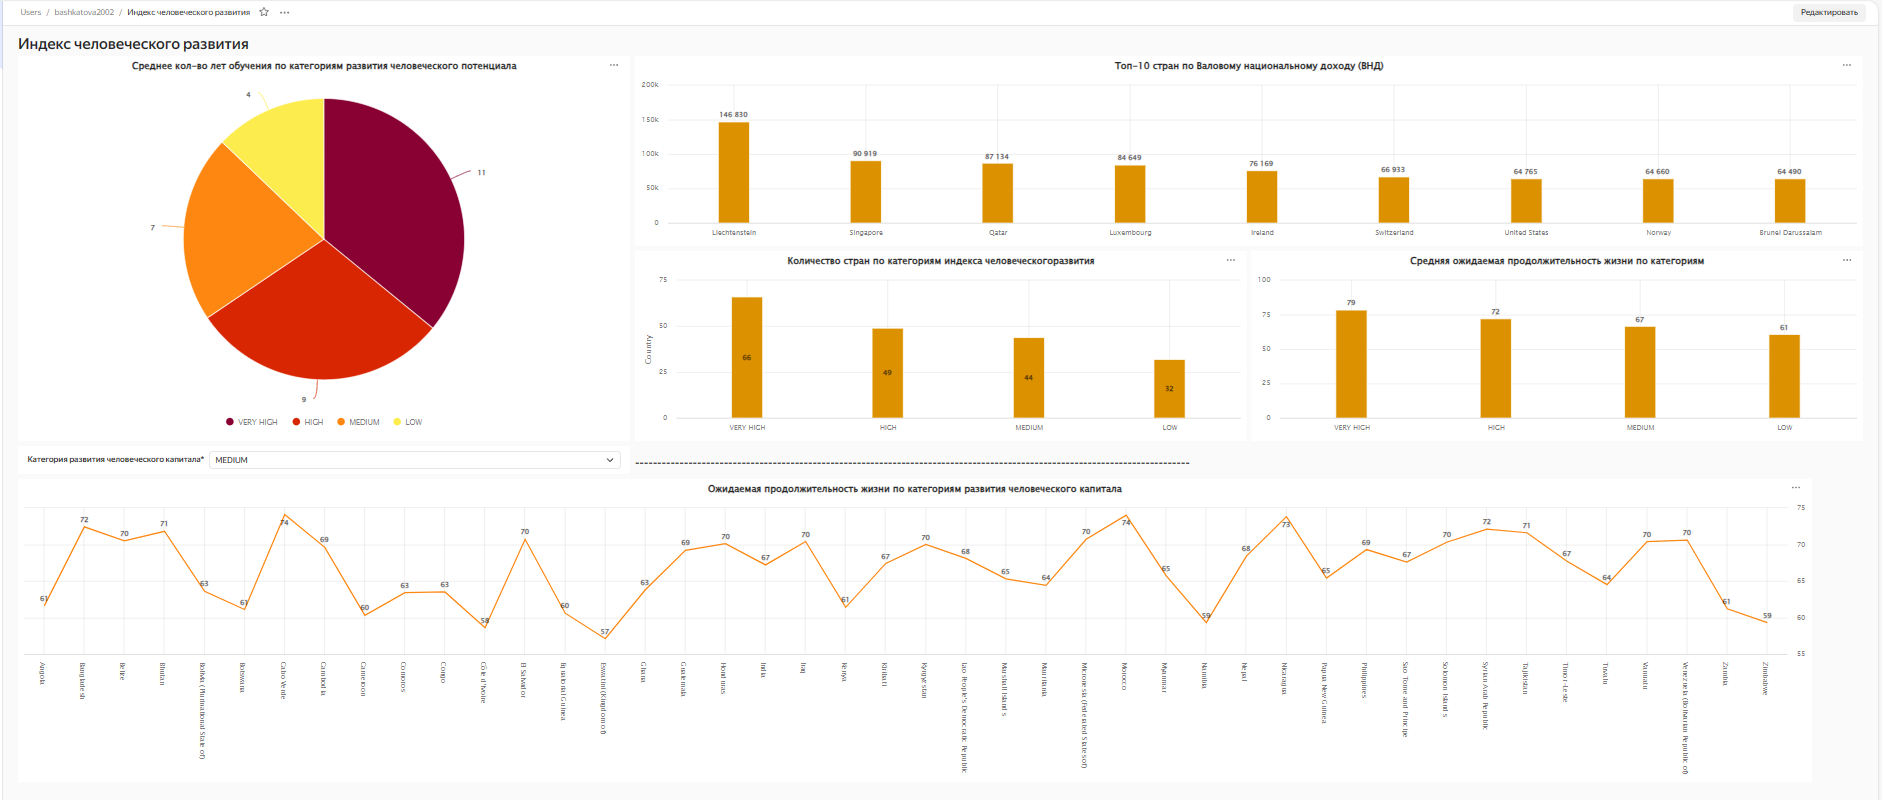

# Самостоятельная работа


3.1. Спроектировать верхнеуровневую архитектуру аналитического решения в `draw.io`. Необходимо использовать:

- Source Layer - слой источников данных.
- Storage Layer - слой хранения данных.
- Business Layer - слой для доступа к данным бизнес пользователей.

3.2. Получить ключ Kaggle API.

3.3. Настроить среду.

3.4. Провести поиск наборов данных в Kaggle по ключевому слову. Выполнить анализ данных датасета Kuggle, обновленный в `2023-2024` годах.

3.5. Провести анализ датасета на пустые значения. Очистить данные от нулевых и пустых значений. Выбрать только те данные, которые можно в дальнейщем анализировать(числовые характеристики, бинарные и т.д.).

3.6. Получить качественный датасет. Выгрузить его в формате `clear.csv`.

3.7. Реализовать визуализацию полученных метрик в отечественной BI-системе или в аналитических панелях с открытым исходным кодом, например `Apache Superset`.

Результаты практической работы представить в виде файла `ФИО.ipynb`, `clear.csv`.

**Вариант**.

`1-11` поиск ведем по ключевым словам,

вариант `12-35` - по названию Датасета.

`Ключевые слова`:

1. ENTERTAINMENT.
2. TRAVEL.
3. STYLE & BEAUTY.
4. PARENTING.
5. HEALTHY LIVING.
6. FOOD & DRINK.
7. BUSINESS.
8. COMEDY.
9. SPORTS.
10. HOME & LIVING.
11. PARENTS.

`ДАТАСЕТ`:

12. Credit Card Fraud Detection.
13. European Soccer Database.
14. Avocado Prices.
15. IBM HR Analytics Employee Attrition & Performance.
16. Medical Cost Personal Datasets.
17. Open Food Facts.
18. Machine Learning & Data Science Survey.
19. Survival Rate of Russian Companies.
20. Yandex: Geo Reviews Dataset 2023.
21. Yandex Music TOP 100 songs.
22. HeadHunter vacancies.
23. Russian Marketplace Reviews E-Commerce Dataset.
24. world economic.
25. credit card transicts.